In [33]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee-dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [34]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [35]:
coffee_full.shape

(2974, 4)

In [36]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [37]:
coffee_red.shape

(200, 4)

1. What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

In [38]:
coffee_drinkers = coffee_red.drinks_coffee.mean()
coffee_drinkers

0.595

In [39]:
no_coffee = 1 - coffee_drinkers
no_coffee

0.405

2. Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [40]:
coffee_red.query('drinks_coffee').height.mean()

68.11962990858616

In [41]:
coffee_red.query('drinks_coffee == False').height.mean()

66.78492279927877

3. Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [42]:
new_sample = coffee_full.sample(200, replace=False)
new_coffee_drinkers = new_sample.drinks_coffee.mean()
new_coffee_drinkers, 1-new_coffee_drinkers

(0.58, 0.42000000000000004)

4. Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

In [43]:
boots_sample = new_sample.sample(200, replace=True)
boots_sample.query('drinks_coffee == False').height.mean()

65.92707078740719

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

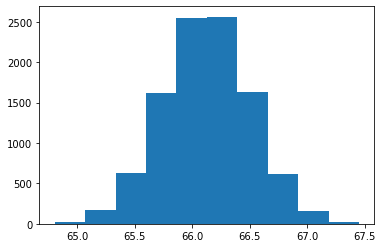

In [45]:
boots_means = []
for _ in np.arange(10000):
    sample = new_sample.sample(200, replace=True)
    boots_means.append(sample.query('drinks_coffee == False').height.mean())
plt.hist(boots_means);

In [46]:
np.percentile(boots_means, 2.5), np.percentile(boots_means, 97.5)

(65.37546427165537, 66.87299169395087)

In [47]:
coffee_full.query('drinks_coffee == False').height.mean()

66.443407762147

In [48]:
97.5-2.5

95.0